# IMPORTS

In [35]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import exoplanet as xo
import astropy.units as u
from astropy.timeseries import LombScargle
import lightkurve as lk
from astropy.io import fits

from uncertainties import ufloat
from uncertainties.umath import *
from scipy import constants

import pymc3 as pm
import aesara_theano_fallback.tensor as tt
import pymc3_ext as pmx

import arviz as az

In [36]:
%matplotlib inline

In [37]:
mpl.rcParams["figure.figsize"] = (6, 4)
# mpl.rcParams["figure.dpi"] = 300
mpl.rcParams['font.size'] = 12
mpl.rcParams['axes.linewidth'] = 0.8
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['xtick.direction'] = 'inout'
mpl.rcParams['ytick.direction'] = 'inout'
mpl.rcParams['xtick.top'] = True
mpl.rcParams['ytick.right'] = True

# Systems Parameters

In [38]:
stars = ['HD224016', 
        'HD17820', 
        'BD+700503', 
        'TOI1273', 
        'TOI1736', 
        'TOI2134', 
        'TOI1710', 
        'TOI1296', 
        'TOI1298', 
        'HD88986', 
        'HD207897']

periods = []

# RV reading

In [39]:
data = {}
for i in stars:
    data["data_{0}".format(i)] = pd.read_csv('./rvs_dataset_'+i+'.csv').iloc[:, 1:] # lo último es para dropear la primera columna que estaba vacía
    print(data["data_{0}".format(i)].shape)

(26, 5)
(35, 5)
(45, 5)
(31, 5)
(30, 5)
(29, 5)
(22, 5)
(15, 5)
(18, 5)
(177, 5)
(24, 5)


In [40]:
list(data.keys())

['data_HD224016',
 'data_HD17820',
 'data_BD+700503',
 'data_TOI1273',
 'data_TOI1736',
 'data_TOI2134',
 'data_TOI1710',
 'data_TOI1296',
 'data_TOI1298',
 'data_HD88986',
 'data_HD207897']

In [42]:
# substract the systemic velocity 
for i in stars:
    data["data_"+i]['vrad'] = data["data_"+i]['vrad'].apply(lambda x: x - data["data_"+i]['vrad'].median())
    data["data_"+i]['vrad_corr_gb'] = data["data_"+i]['vrad_corr_gb'].apply(lambda x: x - data["data_"+i]['vrad_corr_gb'].median())
    data["data_"+i]['vrad_corr_mc'] = data["data_"+i]['vrad_corr_mc'].apply(lambda x: x - data["data_"+i]['vrad_corr_mc'].median())

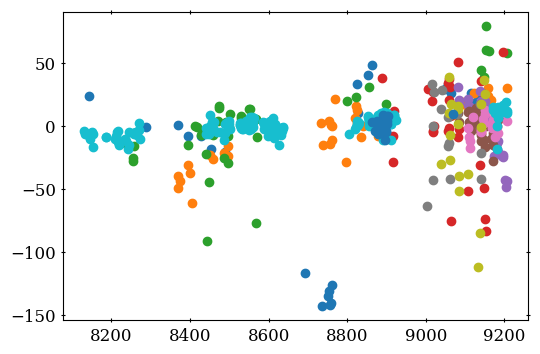

In [43]:
for i in stars:
    plt.plot(data["data_"+i]['rjd'], data["data_"+i]['vrad'], 'o')